### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import warnings

In [269]:
warnings.filterwarnings("ignore")

In [270]:
df = pd.read_csv('data/telco_churn_data.csv')

In [271]:
df.head(20)

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0
5,4412-YLTKF,No,0,27,Offer C,Yes,3.33,Yes,Yes,Fiber Optic,...,33.989524,-118.089299,63288,1,4638,Competitor,Competitor had better devices,0,0,NaN
6,0390-DCFDQ,Yes,1,1,Offer E,Yes,15.28,No,Yes,Cable,...,33.794990,-118.065591,21343,1,3964,Other,Don't know,7,0,NaN
7,3445-HXXGF,Yes,6,58,Offer B,No,0.00,No,Yes,Cable,...,34.168686,-118.057505,10558,1,5444,Dissatisfaction,Service dissatisfaction,2,1,1.0
8,2656-FMOKZ,No,0,15,Offer D,Yes,44.07,Yes,Yes,Cable,...,34.139402,-118.128658,23742,1,5717,Dissatisfaction,Limited range of services,3,0,2.0
9,2070-FNEXE,No,0,7,Offer E,Yes,26.95,No,Yes,DSL,...,34.159007,-118.087353,32369,1,4419,Price,Lack of affordable download/upload speed,3,0,NaN


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [273]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [274]:
object_cols = df.select_dtypes('object').columns.tolist() + ['Customer ID', 'Churn Value']
df_clean = df.drop(object_cols, axis = 1)
df_clean_nona = df_clean.dropna()
#df_clean_nona

In [275]:
df_clean_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 3 to 7040
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                1834 non-null   int64  
 1   Tenure in Months                   1834 non-null   int64  
 2   Avg Monthly Long Distance Charges  1834 non-null   float64
 3   Avg Monthly GB Download            1834 non-null   int64  
 4   Monthly Charge                     1834 non-null   float64
 5   Total Regular Charges              1834 non-null   float64
 6   Total Refunds                      1834 non-null   float64
 7   Total Extra Data Charges           1834 non-null   float64
 8   Total Long Distance Charges        1834 non-null   float64
 9   Age                                1834 non-null   int64  
 10  Number of Dependents               1834 non-null   int64  
 11  Zip Code                           1834 non-null   int64  
 1

In [276]:
df_scaled = (df_clean_nona - df_clean_nona.mean())/df_clean_nona.std()

In [277]:
pca = PCA(n_components=3, random_state=42)
components = pca.fit_transform(df_scaled)

In [278]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(components)
df_clustered = df.dropna(subset=['Customer Satisfaction'])
df_clustered.drop(columns=['Latitude','Longitude'], inplace=True)
df_clustered['cluster'] = kmeans.labels_

In [279]:
df_clustered

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Zip Code,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,cluster
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0,0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,90602,26265,1,2793,Price,Extra data charges,1,0,2.0,0
7,3445-HXXGF,Yes,6,58,Offer B,No,0.00,No,Yes,Cable,...,91024,10558,1,5444,Dissatisfaction,Service dissatisfaction,2,1,1.0,0
8,2656-FMOKZ,No,0,15,Offer D,Yes,44.07,Yes,Yes,Cable,...,91106,23742,1,5717,Dissatisfaction,Limited range of services,3,0,2.0,0
10,0094-OIFMO,No,0,11,Offer D,Yes,11.59,No,Yes,DSL,...,91605,57146,1,5980,Dissatisfaction,Product dissatisfaction,2,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,9586-JGQKH,Yes,8,64,Offer B,Yes,49.26,Yes,Yes,Fiber Optic,...,92234,43141,0,4512,NaN,NaN,1,0,3.0,1
7026,4807-IZYOZ,No,0,51,Offer B,Yes,19.23,No,No,NaN,...,92258,732,0,4725,NaN,NaN,1,0,3.0,0
7029,7203-OYKCT,No,0,72,NaN,Yes,33.93,Yes,Yes,Fiber Optic,...,92266,291,0,5760,NaN,NaN,2,1,5.0,1
7034,0871-OPBXW,No,0,2,Offer E,Yes,6.85,No,No,NaN,...,92027,48690,0,5191,NaN,NaN,1,0,3.0,0


<Axes: xlabel='Monthly Charge', ylabel='Tenure in Months'>

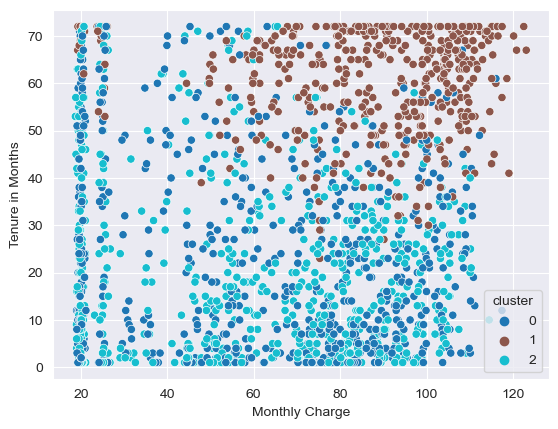

In [282]:
sns.scatterplot(data=df_clustered,x= 'Monthly Charge',y='Tenure in Months', hue='cluster', palette=sns.color_palette('tab10', as_cmap=True))

#fig = px.scatter(df_clustered,x='Monthly Charge', y='Total Regular Charges', color="cluster")
#fig.show()

In [281]:
df_clustered.columns.tolist()

['Customer ID',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Regular Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Gender',
 'Age',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Number of Dependents',
 'City',
 'Zip Code',
 'Population',
 'Churn Value',
 'CLTV',
 'Churn Category',
 'Churn Reason',
 'Total Customer Svc Requests',
 'Product/Service Issues Reported',
 'Customer Satisfaction',
 'cluster']